## Preparing the IMDB data

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500

print("Loading the data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train_sequences')
print(len(x_test), 'test sequences')

print("Pad sequences ")
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape', x_test.shape)

Using TensorFlow backend.


Loading the data...
25000 train_sequences
25000 test sequences
Pad sequences 
x_train shape: (25000, 500)
x_test shape (25000, 500)


## Training and evaluating a simple 1D convnet on the IMDB data

In [2]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))

model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))

model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(1))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 151us/step - loss: 0.8782 - acc: 0.5261 - val_loss: 0.6822 - val_acc: 0.5924
Epoch 2/10
20000/20000 [==============================] - 1s 72us/step - loss: 0.6654 - acc: 0.6615 - val_loss: 0.6369 - val_acc: 0.7448
Epoch 3/10
20000/20000 [==============================] - 1s 73us/step - loss: 0.5842 - acc: 0.7652 - val_loss: 0.5368 - val_acc: 0.7666
Epoch 4/10
20000/20000 [==============================] - 1s 73us/step - loss: 0.4890 - acc: 0.8262 - val_loss: 0.4778 - val_acc: 0.8336
Epoch 5/10
20000/20000 [==============================] - 1s 73us/step - loss: 0.4170 - acc: 0.8465 - val_loss: 0.4557 - val_acc: 0.8148
Epoch 6/10
20000/20000 [==============================] - 1s 73us/step - loss: 0.3799 - acc: 0.8354 - val_loss: 0.4475 - val_acc: 0.8086
Epoch 7/10
20000/20000 [==============================] - 1s 72us/step - loss: 0.3572 - acc: 0.8168 - val_loss: 0.4856 - val_acc

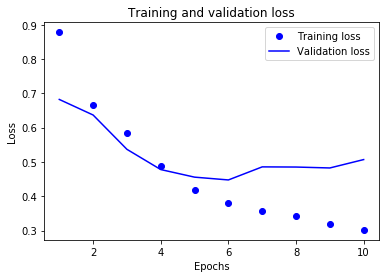

In [5]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss'] # Training loss
val_loss_values = history_dict['val_loss'] # Validation loss

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

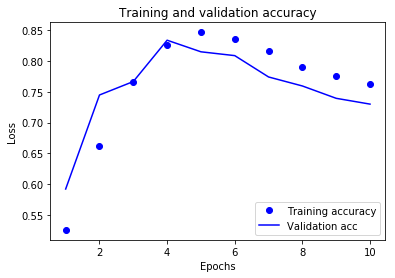

In [6]:
plt.clf # Clear previous fig
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()